# Proyek Klasifikasi Gambar: Vegetable
- **Nama:** Naomi Sitanggang
- **Email:** naomistg5@gmail.com
- **ID Dicoding:** MC006D5X1986

Dataset yang digunakan merupakan dataset sayuran yang memiliki 15 kelas diantaranya :
- Cauliflower
- Cucumber
- Papaya
- Tomato
- Broccoli
- Bean
- Carrot
- Bottle Gourd
- Bitter Gourd
- Capsicum
- Pumpkin
- Radish
- Cabbage
- Potato
- Brinjal

Tautan Dataset: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset


## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install opencv-python scikit-image


In [4]:
!pip uninstall -y numpy
!pip install numpy==1.25.2

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Successfully uninstalled numpy-1.25.2
  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
tensorstore 0.1.73 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
blosc2 3.3.0 requires n

In [1]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.15.0

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.0 which is incompatible.


In [2]:
!pip install --upgrade tensorflowjs
!pip show tensorflow
!pip show tensorflow-decision-forests
!pip install tensorflow-decision-forests==1.10.0

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 22.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: 

In [3]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
import tensorflow as tf
import tensorflowjs as tfjs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation

### Data Loading



In [4]:
import kagglehub

# Unduh versi terbaru dari dataset
lokasi_dataset = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")
print("Lokasi file dataset:", lokasi_dataset)


Lokasi file dataset: /kaggle/input/vegetable-image-dataset


### Menggabungkan direktori



In [5]:
# Gunakan os.path.join untuk memastikan path fleksibel di semua sistem
direktori_awal = os.path.join(lokasi_dataset, "Vegetable Images")
lokasi_latih = os.path.join(direktori_awal, "train")
lokasi_uji = os.path.join(direktori_awal, "test")
lokasi_validasi = os.path.join(direktori_awal, "validation")
gabungan_dir = '/kaggle/merged_data_vegetables'

In [6]:
os.makedirs(gabungan_dir, exist_ok=True)
def gabungkan_folder(sumber_folder, tujuan_folder):
    for folder_asal in sumber_folder:
        for kategori in os.listdir(folder_asal):
            asal_kategori = os.path.join(folder_asal, kategori)
            tujuan_kategori = os.path.join(tujuan_folder, kategori)

            os.makedirs(tujuan_kategori, exist_ok=True)

            for berkas in os.listdir(asal_kategori):
                file_asal = os.path.join(asal_kategori, berkas)
                file_tujuan = os.path.join(tujuan_kategori, berkas)

                if os.path.isfile(file_asal):
                    shutil.copy(file_asal, file_tujuan)

gabungkan_folder([lokasi_latih, lokasi_uji, lokasi_validasi], gabungan_dir)
print(f"Data sudah tergabung di direktori: {gabungan_dir}")


Data sudah tergabung di direktori: /kaggle/merged_data_vegetables


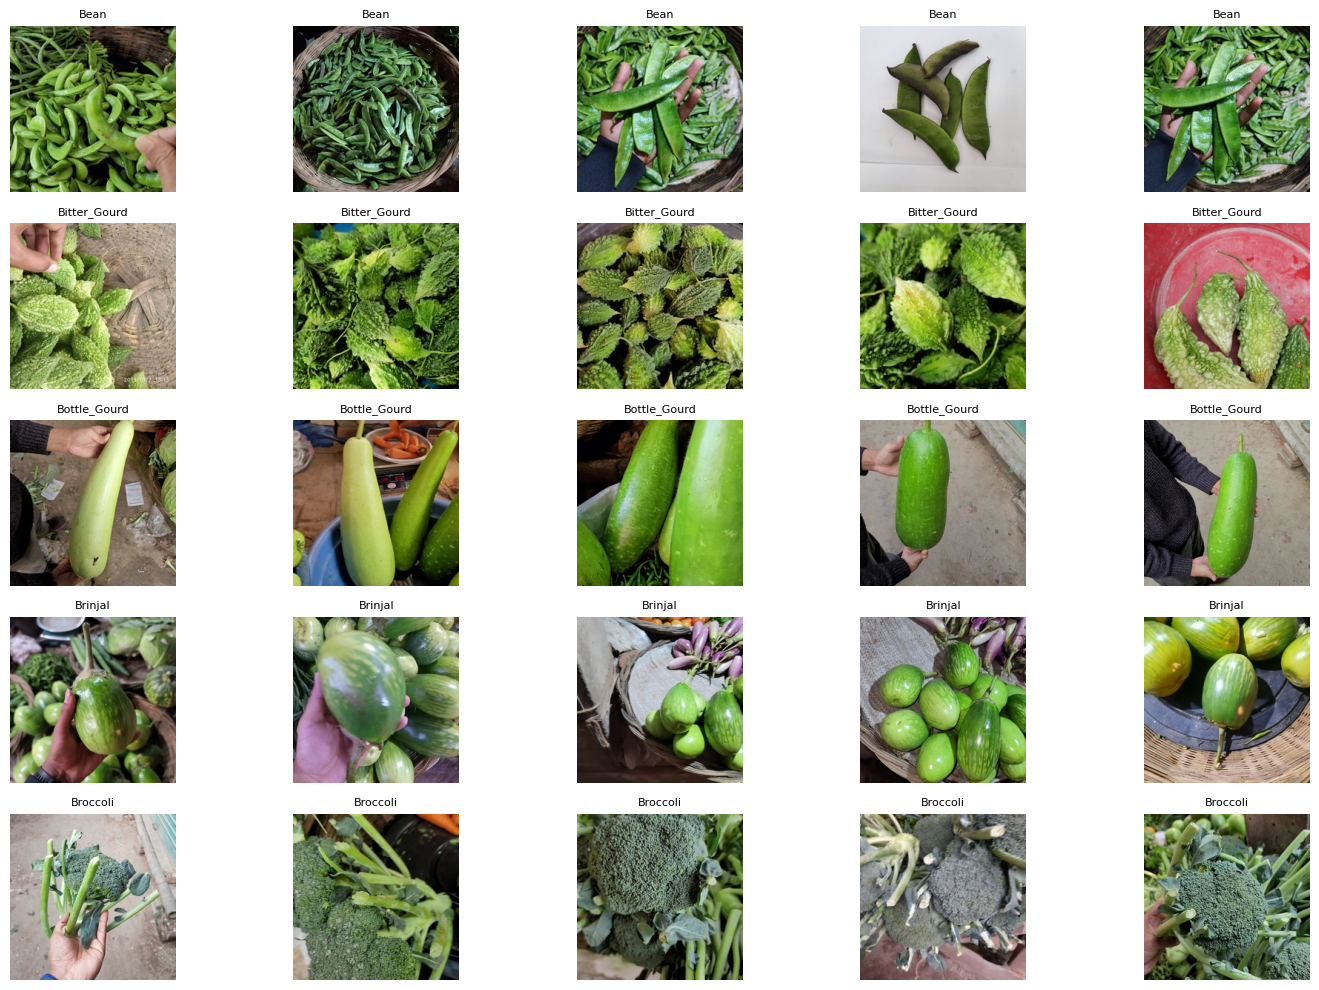

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Ganti dengan direktori gabunganmu
gabungan_dir = '/kaggle/merged_data_vegetables'

# Tampilkan 5 gambar dari 5 kelas pertama
jumlah_kelas = 5
gambar_per_kelas = 5

plt.figure(figsize=(15, 10))

kelas_terpilih = sorted(os.listdir(gabungan_dir))[:jumlah_kelas]
index = 1

for class_name in kelas_terpilih:
    path_kelas = os.path.join(gabungan_dir, class_name)
    gambar_list = os.listdir(path_kelas)[:gambar_per_kelas]

    for nama_gambar in gambar_list:
        path_gambar = os.path.join(path_kelas, nama_gambar)
        try:
            gambar = Image.open(path_gambar)
            plt.subplot(jumlah_kelas, gambar_per_kelas, index)
            plt.imshow(gambar)
            plt.title(class_name, fontsize=8)
            plt.axis('off')
            index += 1
        except Exception as e:
            print(f"Gagal membuka {path_gambar}: {e}")

plt.tight_layout()
plt.show()


### Distribusi jumlah gambar per kelas

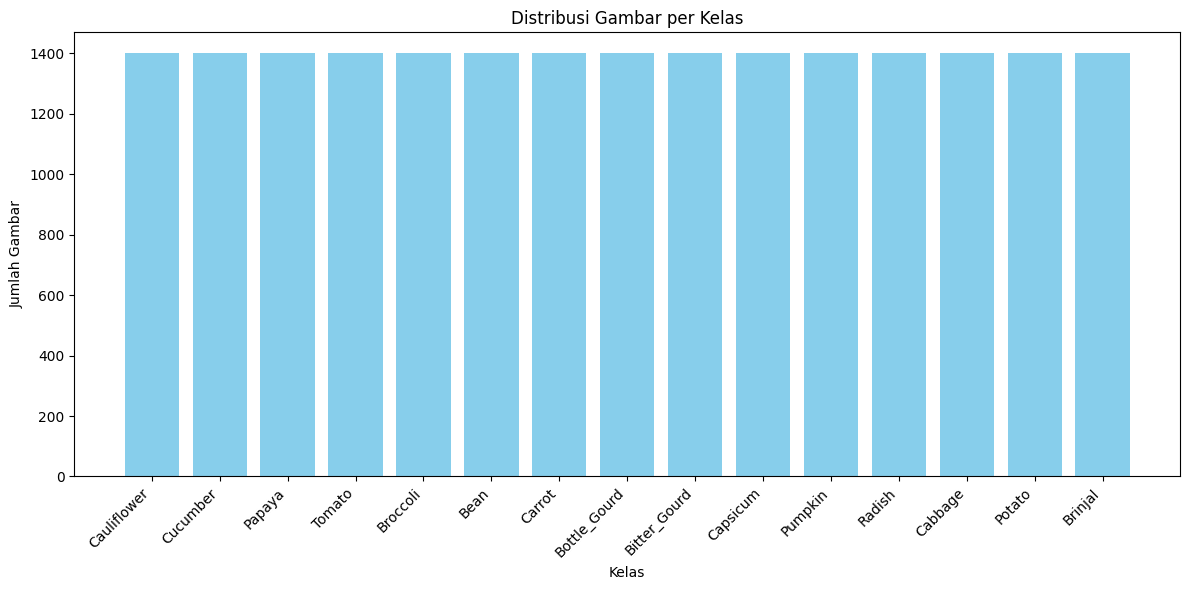

In [8]:
import os
import matplotlib.pyplot as plt

def hitung_gambar_per_kelas(direktori):
    distribusi = {}
    for kelas in os.listdir(direktori):
        path_kelas = os.path.join(direktori, kelas)
        if os.path.isdir(path_kelas):
            jumlah = len([f for f in os.listdir(path_kelas) if os.path.isfile(os.path.join(path_kelas, f))])
            distribusi[kelas] = jumlah
    return distribusi

distribusi = hitung_gambar_per_kelas(gabungan_dir)

def plot_distribusi(distribusi):
    plt.figure(figsize=(12, 6))
    plt.bar(distribusi.keys(), distribusi.values(), color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Kelas")
    plt.ylabel("Jumlah Gambar")
    plt.title("Distribusi Gambar per Kelas")
    plt.tight_layout()
    plt.show()

plot_distribusi(distribusi)

**Insight:** Dari grafik terlihat bahwa jumlah gambar yang ada dalam setiap kelas sebanyak 1400 gambar

### Menghitung resolusi gambar

In [8]:
from PIL import Image
import os

# Daftar direktori yang akan dicek
semua_lokasi = [("Latih", lokasi_latih), ("Uji", lokasi_uji), ("Validasi", lokasi_validasi)]

# Dictionary untuk menyimpan hasil resolusi dari tiap kategori
ukuran_per_dataset = {}

# Loop untuk setiap set data
for nama_set, direktori in semua_lokasi:
    daftar_ukuran = []
    print(f"\n🔍 Mengecek data di folder: {nama_set}")

    for nama_kelas in os.listdir(direktori):
        path_kelas = os.path.join(direktori, nama_kelas)
        if os.path.isdir(path_kelas):
            for nama_file in os.listdir(path_kelas):
                path_gambar = os.path.join(path_kelas, nama_file)
                try:
                    with Image.open(path_gambar) as img:
                        daftar_ukuran.append(img.size)  # format: (lebar, tinggi)
                except Exception as e:
                    print(f"⚠️ Tidak bisa membaca {path_gambar}: {e}")

    ukuran_per_dataset[nama_set] = daftar_ukuran

    # Tampilkan hasil akhir
    resolusi_unik = set(daftar_ukuran)
    print(f"📁 Jumlah gambar di {nama_set}: {len(daftar_ukuran)}")
    print(f"📏 Resolusi unik di {nama_set}: {len(resolusi_unik)}")
    print(f"📐 Daftar resolusi: {resolusi_unik}")



🔍 Mengecek data di folder: Latih
📁 Jumlah gambar di Latih: 15000
📏 Resolusi unik di Latih: 7
📐 Daftar resolusi: {(224, 193), (224, 205), (224, 211), (224, 224), (224, 198), (224, 210), (224, 200)}

🔍 Mengecek data di folder: Uji
📁 Jumlah gambar di Uji: 3000
📏 Resolusi unik di Uji: 2
📐 Daftar resolusi: {(224, 224), (224, 207)}

🔍 Mengecek data di folder: Validasi
📁 Jumlah gambar di Validasi: 3000
📏 Resolusi unik di Validasi: 3
📐 Daftar resolusi: {(224, 223), (224, 224), (224, 187)}


**Insight:** Gambar-gambar pada dataset asli memiliki resolusi gambar yang berbeda beda

### Menyamakan resolusi gambar

In [9]:
gabungan_dir = '/kaggle/merged_data_vegetables'
target_size = (224, 224)

def resize_images(directory, target_size):
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                image_path = os.path.join(class_path, filename)
                if os.path.isfile(image_path):
                    try:
                        img = Image.open(image_path)
                        img = img.resize(target_size)
                        img.save(image_path)
                    except Exception as e:
                        print(f"Error processing {image_path}: {e}")

resize_images(gabungan_dir, target_size)


def check_resolution(image_path):
    try:
        img = Image.open(image_path)
        width, height = img.size
        return width, height
    except (FileNotFoundError, OSError) as e:
        print(f"Error opening {image_path}: {e}")
        return None, None


for class_name in os.listdir(gabungan_dir):
    class_path = os.path.join(gabungan_dir, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            if os.path.isfile(image_path):
                width, height = check_resolution(image_path)
                if width is not None:
                    print(f"Image: {filename}, Resolution: {width}x{height}")

Streaming output truncated to the last 5000 lines.
Image: 1092.jpg, Resolution: 224x224
Image: 1264.jpg, Resolution: 224x224
Image: 0352.jpg, Resolution: 224x224
Image: 0053.jpg, Resolution: 224x224
Image: 0298.jpg, Resolution: 224x224
Image: 1197.jpg, Resolution: 224x224
Image: 0880.jpg, Resolution: 224x224
Image: 0603.jpg, Resolution: 224x224
Image: 0979.jpg, Resolution: 224x224
Image: 0601.jpg, Resolution: 224x224
Image: 0228.jpg, Resolution: 224x224
Image: 0326.jpg, Resolution: 224x224
Image: 1331.jpg, Resolution: 224x224
Image: 0670.jpg, Resolution: 224x224
Image: 0878.jpg, Resolution: 224x224
Image: 0319.jpg, Resolution: 224x224
Image: 0138.jpg, Resolution: 224x224
Image: 0855.jpg, Resolution: 224x224
Image: 1062.jpg, Resolution: 224x224
Image: 0585.jpg, Resolution: 224x224
Image: 0926.jpg, Resolution: 224x224
Image: 0681.jpg, Resolution: 224x224
Image: 0207.jpg, Resolution: 224x224
Image: 0918.jpg, Resolution: 224x224
Image: 1143.jpg, Resolution: 224x224
Image: 0824.jpg, Resolut

### Menghapus beberapa kelas

In [10]:
import os

# Gunakan direktori gabungan yang sudah didefinisikan sebelumnya
gabungan_dir = '/kaggle/merged_data_vegetables'
kelas_dihapus = ['Bottle_Gourd', 'Capsicum', 'Broccoli', 'Radish', 'Pumpkin', 'Potato']

for nama_kelas in kelas_dihapus:
    path_kelas = os.path.join(gabungan_dir, nama_kelas)

    if os.path.isdir(path_kelas):
        try:
            # Hapus semua file di dalam folder
            for nama_file in os.listdir(path_kelas):
                path_file = os.path.join(path_kelas, nama_file)
                if os.path.isfile(path_file):
                    os.remove(path_file)

            # Setelah kosong, hapus foldernya
            os.rmdir(path_kelas)
            print(f"✅ Kelas '{nama_kelas}' berhasil dihapus.")

        except Exception as e:
            print(f"❌ Gagal menghapus '{nama_kelas}': {e}")
    else:
        print(f"⚠️ Kelas '{nama_kelas}' tidak ditemukan di {gabungan_dir}.")


✅ Kelas 'Bottle_Gourd' berhasil dihapus.
✅ Kelas 'Capsicum' berhasil dihapus.
✅ Kelas 'Broccoli' berhasil dihapus.
✅ Kelas 'Radish' berhasil dihapus.
✅ Kelas 'Pumpkin' berhasil dihapus.
✅ Kelas 'Potato' berhasil dihapus.


In [9]:
import os

gabungan_dir = '/kaggle/merged_data_vegetables' \

jumlah_per_kelas = {}

for nama_kelas in os.listdir(gabungan_dir):
    path_kelas = os.path.join(gabungan_dir, nama_kelas)
    if os.path.isdir(path_kelas):
        jumlah = len([
            f for f in os.listdir(path_kelas)
            if os.path.isfile(os.path.join(path_kelas, f))
        ])
        jumlah_per_kelas[nama_kelas] = jumlah

# Tampilkan jumlah per kelas
for kelas, jumlah in jumlah_per_kelas.items():
    print(f"Kelas: {kelas}, Jumlah: {jumlah}")

# Hitung total gambar
total = sum(jumlah_per_kelas.values())
print(f"\nTotal data in merged_data: {total}")


Kelas: Cauliflower, Jumlah: 1400
Kelas: Cucumber, Jumlah: 1400
Kelas: Papaya, Jumlah: 1400
Kelas: Tomato, Jumlah: 1400
Kelas: Bean, Jumlah: 1400
Kelas: Carrot, Jumlah: 1400
Kelas: Bitter_Gourd, Jumlah: 1400
Kelas: Cabbage, Jumlah: 1400
Kelas: Brinjal, Jumlah: 1400

Total data in merged_data: 12600


In [11]:
from PIL import Image
import os
from collections import Counter

# Ganti ke path folder yang dipakai
gabungan_dir = '/kaggle/merged_data_vegetables'

# Simpan semua resolusi gambar di list
image_sizes = []

# Loop semua subfolder (kelas)
for class_name in os.listdir(gabungan_dir):
    class_path = os.path.join(gabungan_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                with Image.open(image_path) as img:
                    image_sizes.append(img.size)
            except Exception as e:
                print(f"Error membaca {image_path}: {e}")

# Hitung dan tampilkan variasi ukuran gambar
size_counts = Counter(image_sizes)

print("Variasi resolusi gambar yang ditemukan:")
for size, count in size_counts.items():
    print(f"Ukuran: {size}, Jumlah: {count}")

print(f"\nTotal variasi ukuran: {len(size_counts)}")


Variasi resolusi gambar yang ditemukan:
Ukuran: (224, 224), Jumlah: 12600

Total variasi ukuran: 1


**Insight:** Kelas yang tersisa hanya 9 kelas yaitu Tomato, Papaya, Brinjal, Cauliflower, Carrort, Cabbage, Bean, Bitter_Gourd, Cucumber.

### Data Preprocessing


#### Split Dataset

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Direktori asal (setelah resize & penggabungan)
gabungan_dir = '/kaggle/merged_data_vegetables'

# Direktori tujuan split
lokasi_latih = '/kaggle/train'
lokasi_validasi = '/kaggle/validation'
lokasi_uji = '/kaggle/test'

# Buat folder tujuan jika belum ada
os.makedirs(lokasi_latih, exist_ok=True)
os.makedirs(lokasi_validasi, exist_ok=True)
os.makedirs(lokasi_uji, exist_ok=True)

# Rasio split
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Proses split untuk setiap kelas
for class_name in os.listdir(gabungan_dir):
    class_path = os.path.join(gabungan_dir, class_name)
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Split menjadi train, val, test
        train_files, temp_files = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=test_ratio / (test_ratio + val_ratio), random_state=42)

        # Path kelas tujuan
        class_train_path = os.path.join(lokasi_latih, class_name)
        class_val_path = os.path.join(lokasi_validasi, class_name)
        class_test_path = os.path.join(lokasi_uji, class_name)

        os.makedirs(class_train_path, exist_ok=True)
        os.makedirs(class_val_path, exist_ok=True)
        os.makedirs(class_test_path, exist_ok=True)

        # Salin gambar ke folder tujuan
        for file in train_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(class_train_path, file))

        for file in val_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(class_val_path, file))

        for file in test_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(class_test_path, file))

print("✅ Split data selesai! Data telah dipisahkan ke folder 'train', 'validation', dan 'test'.")


✅ Split data selesai! Data telah dipisahkan ke folder 'train', 'validation', dan 'test'.


In [13]:
# Menampilkan jumlah data setelah split
def count_files_in_directory(directory):
    return sum(len(files) for _, _, files in os.walk(directory))

# Hitung jumlah gambar per kategori dan total di setiap folder split
for split_dir, split_name in zip([lokasi_latih, lokasi_validasi, lokasi_uji], ['Train', 'Validation', 'Test']):
    print(f"\nJumlah data di folder {split_name}:")
    for class_name in os.listdir(split_dir):
        class_path = os.path.join(split_dir, class_name)
        if os.path.isdir(class_path):
            count = count_files_in_directory(class_path)
            print(f"  Kelas {class_name}: {count} gambar")



Jumlah data di folder Train:
  Kelas Cauliflower: 979 gambar
  Kelas Cucumber: 979 gambar
  Kelas Papaya: 979 gambar
  Kelas Tomato: 979 gambar
  Kelas Bean: 979 gambar
  Kelas Carrot: 979 gambar
  Kelas Bitter_Gourd: 979 gambar
  Kelas Cabbage: 979 gambar
  Kelas Brinjal: 979 gambar

Jumlah data di folder Validation:
  Kelas Cauliflower: 210 gambar
  Kelas Cucumber: 210 gambar
  Kelas Papaya: 210 gambar
  Kelas Tomato: 210 gambar
  Kelas Bean: 210 gambar
  Kelas Carrot: 210 gambar
  Kelas Bitter_Gourd: 210 gambar
  Kelas Cabbage: 210 gambar
  Kelas Brinjal: 210 gambar

Jumlah data di folder Test:
  Kelas Cauliflower: 211 gambar
  Kelas Cucumber: 211 gambar
  Kelas Papaya: 211 gambar
  Kelas Tomato: 211 gambar
  Kelas Bean: 211 gambar
  Kelas Carrot: 211 gambar
  Kelas Bitter_Gourd: 211 gambar
  Kelas Cabbage: 211 gambar
  Kelas Brinjal: 211 gambar


#### Augmentasi

In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Direktori dataset latih (tetap)
direktori_latih = '/kaggle/train'

# Kelas yang ingin dilakukan augmentasi
kelas_aug = ["Papaya"]

# Konfigurasi generator untuk augmentasi gambar
generator_aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Iterasi setiap kelas target untuk proses augmentasi
for kelas in kelas_aug:
    folder_kelas = os.path.join(direktori_latih, kelas)
    daftar_file = [file for file in os.listdir(folder_kelas) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"🔁 Mulai augmentasi untuk kelas '{kelas}' - Total gambar asli: {len(daftar_file)}")

    total_dibuat = 0
    batas_gambar = 300

    for file_gambar in daftar_file:
        if total_dibuat >= batas_gambar:
            break

        path_gambar = os.path.join(folder_kelas, file_gambar)
        gambar_asli = load_img(path_gambar)
        data_array = img_to_array(gambar_asli)
        data_array = np.expand_dims(data_array, axis=0)

        # Hanya satu augmentasi per gambar agar tidak berlebihan
        batch_ke = 0
        for hasil in generator_aug.flow(data_array, batch_size=1, save_to_dir=folder_kelas,
                                        save_prefix="aug", save_format="jpg"):
            batch_ke += 1
            total_dibuat += 1
            if batch_ke >= 1 or total_dibuat >= batas_gambar:
                break

    print(f"✅ Augmentasi selesai untuk '{kelas}' - Gambar baru: {total_dibuat}\n")


🔁 Mulai augmentasi untuk kelas 'Papaya' - Total gambar asli: 979
✅ Augmentasi selesai untuk 'Papaya' - Gambar baru: 300



In [15]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Direktori dataset latih (tetap)
direktori_latih = '/kaggle/train'

# Kelas yang ingin dilakukan augmentasi
kelas_aug = ["Cucumber"]

# Konfigurasi generator untuk augmentasi gambar
generator_aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Iterasi setiap kelas target untuk proses augmentasi
for kelas in kelas_aug:
    folder_kelas = os.path.join(direktori_latih, kelas)
    daftar_file = [file for file in os.listdir(folder_kelas) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"🔁 Mulai augmentasi untuk kelas '{kelas}' - Total gambar asli: {len(daftar_file)}")

    total_dibuat = 0
    batas_gambar = 300

    for file_gambar in daftar_file:
        if total_dibuat >= batas_gambar:
            break

        path_gambar = os.path.join(folder_kelas, file_gambar)
        gambar_asli = load_img(path_gambar)
        data_array = img_to_array(gambar_asli)
        data_array = np.expand_dims(data_array, axis=0)

        # Hanya satu augmentasi per gambar agar tidak berlebihan
        batch_ke = 0
        for hasil in generator_aug.flow(data_array, batch_size=1, save_to_dir=folder_kelas,
                                        save_prefix="aug", save_format="jpg"):
            batch_ke += 1
            total_dibuat += 1
            if batch_ke >= 1 or total_dibuat >= batas_gambar:
                break

    print(f"✅ Augmentasi selesai untuk '{kelas}' - Gambar baru: {total_dibuat}\n")


🔁 Mulai augmentasi untuk kelas 'Cucumber' - Total gambar asli: 979
✅ Augmentasi selesai untuk 'Cucumber' - Gambar baru: 300



## Modelling

In [ ]:
# Direktori
lokasi_latih = '/kaggle/train'
lokasi_validasi = '/kaggle/validation'
lokasi_uji = '/kaggle/test'

# Setup strategi komputasi (TPU/GPU/CPU)
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategi_distribusi = tf.distribute.TPUStrategy(resolver)
    print("🚀 TPU terdeteksi dan digunakan.")
except ValueError:
    strategi_distribusi = tf.distribute.MirroredStrategy()
    print("⚙️  Menggunakan GPU atau CPU.")

# Normalisasi data gambar (augmentasi sudah dilakukan sebelumnya)
prepro_latih = ImageDataGenerator(rescale=1./255)
prepro_validasi = ImageDataGenerator(rescale=1./255)
prepro_uji = ImageDataGenerator(rescale=1./255)

# Penyesuaian batch size berdasarkan perangkat
batch_size = 64 * strategi_distribusi.num_replicas_in_sync

# Loader gambar dari masing-masing folder
data_latih = prepro_latih.flow_from_directory(
    lokasi_latih,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

data_validasi = prepro_validasi.flow_from_directory(
    lokasi_validasi,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

data_uji = prepro_uji.flow_from_directory(
    lokasi_uji,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Menentukan jumlah kelas dari data latih
jumlah_kategori = len(data_latih.class_indices)

# Definisi model CNN di dalam scope strategi
with strategi_distribusi.scope():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(jumlah_kategori, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Inisialisasi callback
berhenti_dini = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
simpan_terbaik = ModelCheckpoint('model_terbaik.h5', monitor='val_accuracy', save_best_only=True)

# Training model
riwayat_training = model.fit(
    data_latih,
    epochs=20,
    validation_data=data_validasi,
    callbacks=[berhenti_dini, simpan_terbaik]
)

# Evaluasi akhir di semua dataset
loss_latih, akurasi_latih = model.evaluate(data_latih, verbose=0)
loss_validasi, akurasi_validasi = model.evaluate(data_validasi, verbose=0)
loss_uji, akurasi_uji = model.evaluate(data_uji, verbose=0)

# Output hasil akhir
print("\n📈 Ringkasan Evaluasi Akhir:")
print(f"🧪 Akurasi Data Latih     : {akurasi_latih:.4f}")
print(f"🧪 Akurasi Data Validasi  : {akurasi_validasi:.4f}")
print(f"🧪 Akurasi Data Pengujian : {akurasi_uji:.4f}")


⚙️  Menggunakan GPU atau CPU.
Found 9406 images belonging to 9 classes.
Found 1890 images belonging to 9 classes.
Found 1899 images belonging to 9 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3899 - loss: 2.0810

147/147 ━━━━━━━━━━━━━━━━━━━━ 1238s 8s/step - accuracy: 0.3910 - loss: 2.0758 - val_accuracy: 0.8243 - val_loss: 0.5812
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8001 - loss: 0.5840

147/147 ━━━━━━━━━━━━━━━━━━━━ 1220s 8s/step - accuracy: 0.8003 - loss: 0.5835 - val_accuracy: 0.9138 - val_loss: 0.2763
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8952 - loss: 0.3125

147/147 ━━━━━━━━━━━━━━━━━━━━ 1240s 8s/step - accuracy: 0.8952 - loss: 0.3123 - val_accuracy: 0.9365 - val_loss: 0.2101
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9362 - loss: 0.1963

147/147 ━━━━━━━━━━━━━━━━━━━━ 1203s 8s/step - accuracy: 0.9363 - loss: 0.1962 - val_accuracy: 0.9534 - val_loss: 0.1573
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9606 - loss: 0.1184

147/147 ━━━━━━━━━━━━━━━━━━━━ 1209s 8s/step - accuracy: 0.9606 - loss: 0.1183 - val_accuracy: 0.9667 - val_loss: 0.1196
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1217s 8s/step - accuracy: 0.9652 - loss: 0.1084 - val_accuracy: 0.9667 - val_loss: 0.1014
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9749 - loss: 0.0706

147/147 ━━━━━━━━━━━━━━━━━━━━ 1201s 8s/step - accuracy: 0.9750 - loss: 0.0706 - val_accuracy: 0.9720 - val_loss: 0.1062
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1202s 8s/step - accuracy: 0.9798 - loss: 0.0626 - val_accuracy: 0.9688 - val_loss: 0.1121
Epoch 9/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1239s 8s/step - accuracy: 0.9783 - loss: 0.0645 - val_accuracy: 0.9513 - val_loss: 0.1638
Epoch 10/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9854 - loss: 0.0451

147/147 ━━━━━━━━━━━━━━━━━━━━ 1203s 8s/step - accuracy: 0.9854 - loss: 0.0451 - val_accuracy: 0.9751 - val_loss: 0.1045
Epoch 11/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1189s 8s/step - accuracy: 0.9827 - loss: 0.0519 - val_accuracy: 0.9730 - val_loss: 0.0896
Epoch 12/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1227s 8s/step - accuracy: 0.9903 - loss: 0.0324 - val_accuracy: 0.9656 - val_loss: 0.1322
Epoch 13/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1230s 8s/step - accuracy: 0.9749 - loss: 0.0775 - val_accuracy: 0.9667 - val_loss: 0.1086
Epoch 14/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1206s 8s/step - accuracy: 0.9886 - loss: 0.0370 - val_accuracy: 0.9746 - val_loss: 0.0954
Epoch 15/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1215s 8s/step - accuracy: 0.9921 - loss: 0.0282 - val_accuracy: 0.9714 - val_loss: 0.1005
Epoch 16/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1209s 8s/step - accuracy: 0.9900 - loss: 0.0307 - val_accuracy: 0.9667 - val_loss: 0.1309

📈 Ringkasan Evaluasi Akhir:
🧪 Akurasi Data Latih     : 0.9996
🧪 Akurasi Data Validasi  : 0.973

**Insight:** Model klasifikasi gambar sayuran menunjukkan performa yang sangat baik dengan akurasi data latih sebesar 99.96%, validasi 97.30%, dan pengujian 96.84%. Akurasi yang tinggi dan konsisten ini mengindikasikan bahwa model mampu mengenali pola dengan baik tanpa mengalami overfitting, serta memiliki kemampuan generalisasi yang kuat terhadap data baru.

### Menyimpan model untuk berjaga-jaga digunakan pada saat konversi model supaya tidak kena limit runtime

In [ ]:
model.save("model_terbaik.h5")


## Evaluasi dan Visualisasi

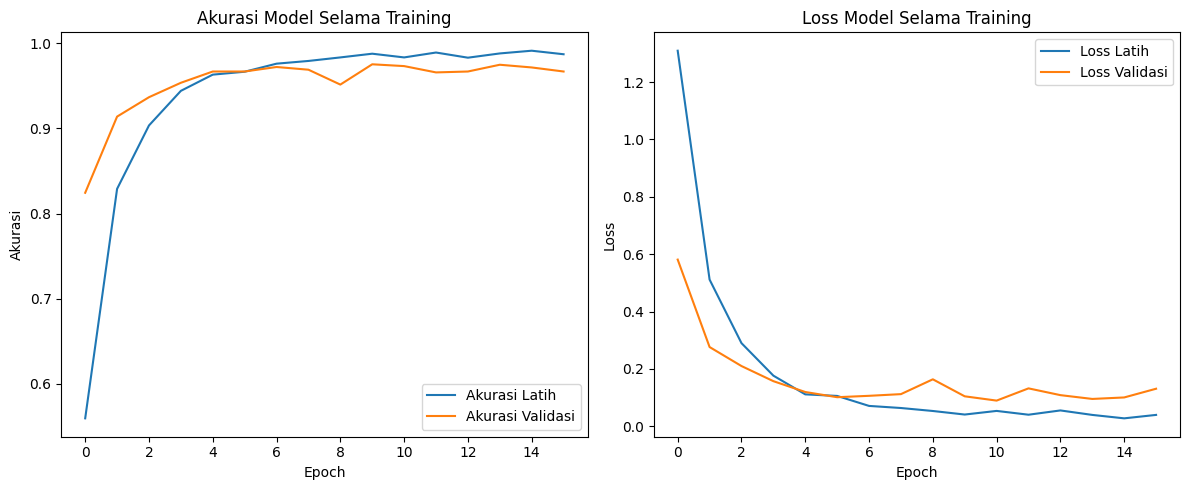

In [ ]:
# Visualisasi akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(riwayat_training.history['accuracy'], label='Akurasi Latih')
plt.plot(riwayat_training.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Visualisasi loss
plt.subplot(1, 2, 2)
plt.plot(riwayat_training.history['loss'], label='Loss Latih')
plt.plot(riwayat_training.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


30/30 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step


<Figure size 1000x800 with 0 Axes>

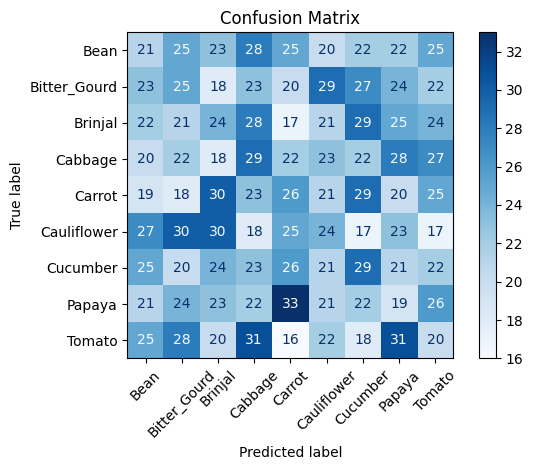

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Ambil data uji dan labelnya
y_pred_prob = model.predict(data_uji)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = data_uji.classes
label_names = list(data_uji.class_indices.keys())

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


**Insight:** Grafik akurasi dan loss selama pelatihan menunjukkan proses pelatihan yang stabil dan efektif, serta confusion matrix memperlihatkan bahwa model mampu mengenali setiap kelas dengan presisi tinggi.

## Konversi Model

In [16]:
# Model SavedModel

import tensorflow as tf

# Memuat model dari file .h5
model = tf.keras.models.load_model('model_terbaik.h5')

# Menyimpan model dalam format SavedModel
lokasi_simpan = 'saved_model'
tf.saved_model.save(model, lokasi_simpan)

print(f"✅ Model telah berhasil disimpan dalam format SavedModel di folder: {lokasi_simpan}")

✅ Model telah berhasil disimpan dalam format SavedModel di folder: saved_model


In [17]:
# Model TF-Lite

import tensorflow as tf
import gc

# Bersihkan sesi sebelumnya
tf.keras.backend.clear_session()
gc.collect()

# Muat model langsung dari .h5
model = tf.keras.models.load_model('model_terbaik.h5')

# Konversi langsung dari Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Ringan & efisien
tflite_model = converter.convert()

# Simpan ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ Model berhasil dikonversi ke TFLite dari file .h5!")


Saved artifact at '/tmp/tmp9gkkkiwc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  138666193638352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193633552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193637584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193636048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193635664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193635472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193634128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193636624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193636816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193638160: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model berhasil 

In [18]:
# Model TFJS
import tensorflowjs as tfjs
import tensorflow as tf

# Muat model dari file .h5
model = tf.keras.models.load_model('model_terbaik.h5')

# Konversi dan simpan dalam format TFJS ke folder
tfjs_target_dir = 'tfjs_model'
tfjs.converters.save_keras_model(model, tfjs_target_dir)

print(f"✅ Model berhasil dikonversi ke TFJS dan disimpan di folder: {tfjs_target_dir}")

failed to lookup keras version from the file,
    this is likely a weight only file
✅ Model berhasil dikonversi ke TFJS dan disimpan di folder: tfjs_model


## Inference (Optional)

In [20]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import random
import gc

# === 1. Bersihkan sesi dan konversi ulang model ===
tf.keras.backend.clear_session()
gc.collect()

model = tf.keras.models.load_model('model_terbaik.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ Model berhasil dikonversi ke TFLite dari file .h5!")

# === 2. Load TFLite model ===
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# === 3. Ambil input dan output detail ===
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Cek info input model
input_index = input_details[0]['index']
input_dtype = input_details[0]['dtype']
input_shape = input_details[0]['shape']

# === 4. Pilih gambar acak dari dataset ===
base_dir = '/kaggle/merged_data_vegetables'
class_folders = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]
chosen_class = random.choice(class_folders)
chosen_class_path = os.path.join(base_dir, chosen_class)
image_files = [f for f in os.listdir(chosen_class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
chosen_image = random.choice(image_files)
image_path = os.path.join(chosen_class_path, chosen_image)

# === 5. Load dan siapkan gambar sesuai tipe input ===
img = Image.open(image_path).resize((input_shape[1], input_shape[2]))

# Konversi sesuai tipe input model
if input_dtype == np.float32:
    input_data = np.expand_dims(np.array(img, dtype=np.float32) / 255.0, axis=0)
elif input_dtype == np.uint8:
    input_data = np.expand_dims(np.array(img, dtype=np.uint8), axis=0)
else:
    raise ValueError(f"Tipe input tidak didukung: {input_dtype}")

# === 6. Inference ===
interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# === 7. Ambil hasil prediksi ===
predicted_class_index = np.argmax(output_data)

# === 8. Label sesuai urutan kelas ===
class_labels = [
    "Bean", "Bitter_Gourd", "Brinjal", "Cabbage", "Carrot",
    "Cauliflower", "Cucumber", "Papaya", "Tomato"
]
predicted_class_name = class_labels[predicted_class_index]

# === 9. Cetak hasil ===
print("🎯 Gambar dipilih:")
print(f"📁 Kelas asli      : {chosen_class}")
print(f"🖼️ Nama file       : {chosen_image}")
print("\n📈 Hasil Prediksi:")
print(f"✅ Predicted index : {predicted_class_index}")
print(f"✅ Predicted class : {predicted_class_name}")
print(f"✅ Match           : {predicted_class_name == chosen_class}")


Saved artifact at '/tmp/tmpts1kly7t'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  138666192644688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666192649296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666192645072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666192643728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666192642960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666192645264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666192643152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666192645840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193642384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193637392: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model berhasil 

**Insight:** Dari hasil inference menggunakan  model TF-Lite terlihat bahwa kelas asli dan kelas prediksi sama yaitu Bitter_Gourd

### Mendownload model

In [21]:
import tensorflow as tf
import tensorflowjs as tfjs
import gc
import os

# Bersihkan sesi sebelumnya
tf.keras.backend.clear_session()
gc.collect()

# === 1. Load model dari .h5 ===
model_path = 'model_terbaik.h5'
model = tf.keras.models.load_model(model_path)

# === 2. Simpan ke SavedModel format ===
saved_model_dir = 'saved_model'
tf.saved_model.save(model, saved_model_dir)
print(f"✅ Model disimpan ke format SavedModel di folder: {saved_model_dir}")

# === 3. Konversi ke TFLite dan simpan ke folder ===
tflite_dir = 'tflite'
os.makedirs(tflite_dir, exist_ok=True)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Simpan model TFLite
with open(os.path.join(tflite_dir, 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

# Simpan label manual (jika ada)
labels = [
    "Bean", "Bitter_Gourd", "Brinjal", "Cabbage", "Carrot",
    "Cauliflower", "Cucumber", "Papaya", "Tomato"
]
with open(os.path.join(tflite_dir, 'label.txt'), 'w') as f:
    f.write('\n'.join(labels))

print(f"✅ Model disimpan ke format TFLite di folder: {tflite_dir}")

# === 4. Konversi ke TensorFlow.js dan simpan ===
tfjs_dir = 'tfjs_model'
tfjs.converters.save_keras_model(model, tfjs_dir)
print(f"✅ Model disimpan ke format TensorFlow.js di folder: {tfjs_dir}")


✅ Model disimpan ke format SavedModel di folder: saved_model
Saved artifact at '/tmp/tmp1_7dqqtc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  138666193645840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193647376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193643152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193648720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193643536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193644880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193645072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193648144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193640080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138666193634896: TensorS

✅ Model disimpan ke format TFLite di folder: tflite
failed to lookup keras version from the file,
    this is likely a weight only file
✅ Model disimpan ke format TensorFlow.js di folder: tfjs_model


In [22]:
import shutil

# Buat ZIP dari masing-masing folder
shutil.make_archive('saved_model', 'zip', 'saved_model')
shutil.make_archive('tflite', 'zip', 'tflite')
shutil.make_archive('tfjs_model', 'zip', 'tfjs_model')

print("✅ Semua folder berhasil di-zip dan siap untuk didownload!")


✅ Semua folder berhasil di-zip dan siap untuk didownload!


In [28]:
!pip freeze > requirements.txt
